## Implementing Linear Regression
The steps are,  
Training:
- Initialize weight as 0
- Initialize bias as 0  
  
Given a data point:  
- Predict result by using y = wx + b
- Calculate error
- Use gradient descent to figure out weight and bias
- Repeat n times

In [35]:
import numpy as np

In [36]:
class LinearRegression:
    
    def __init__(self, lr = 0.001, n_iters = 1000):
        self.lr = lr
        self.n_iters = 1000
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for i in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias

            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db
        
    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

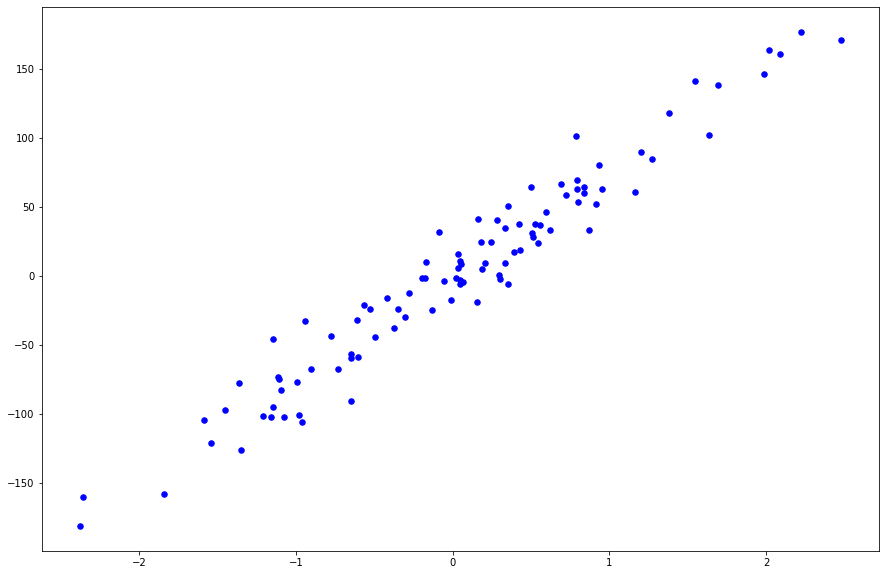

In [37]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

X, y = datasets.make_regression(n_samples = 100, n_features = 1, noise = 20, random_state = 4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

fig = plt.figure(figsize=(15,10))
plt.scatter(X[:,0], y, color='b', marker = "o", s = 30)
plt.show()

In [38]:
reg = LinearRegression(lr=0.05)
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)

def mse(y_test, predictions):
    return np.mean((y_test-predictions)**2)

mse = mse(y_test, predictions)
print(mse)

305.77413162286405
